# Deep Neural Networks

In this nb you will train a DNN to classify images of handwritten digits.

For this exercise you will need the `tensorflow` and `keras` python packages. If you haven't installed them already in your enviroment, you can do so by running `pip install tensorflow keras`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

# The Data
We use the [MNIST](https://www.tensorflow.org/datasets/catalog/mnist) dataset, which contains 70'000 images of handwritten digits.   

Each image has a shape of (28, 28) pixels.

In [2]:
from tensorflow.keras.datasets import mnist

# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Let's see the shape of the data
print(type(X_train))
print(X_train.shape)
print(X_test.shape)


<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)


# Data Visualization
To get an understanding of the data, some images from the dataset are visualized.

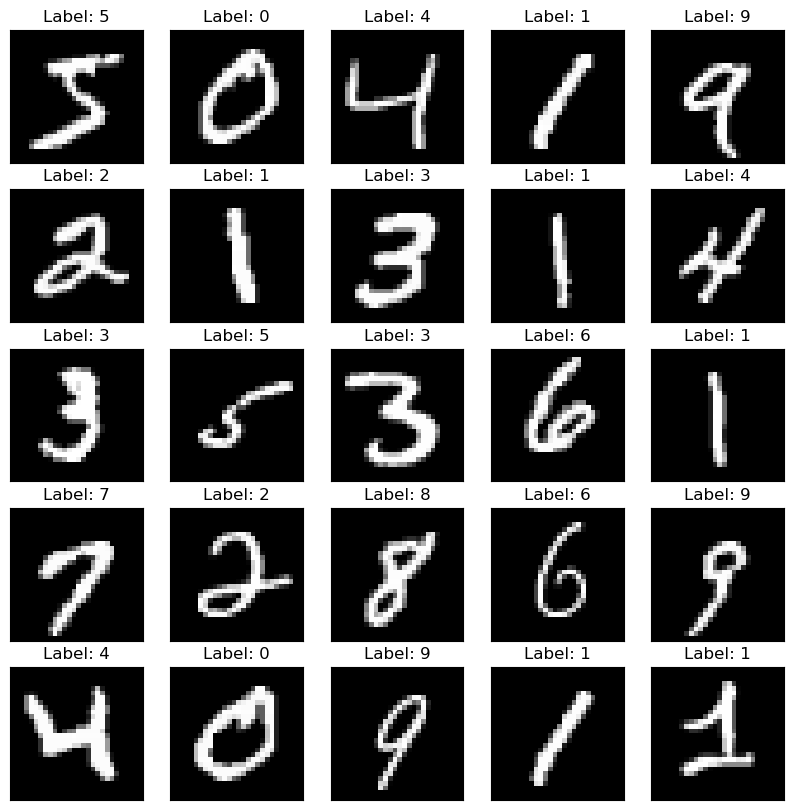

In [3]:


fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            title=f'Label: {y_train[i]}')
    

# Data Preprocessing
1. One-Hot Encoding  
Since we have a classification problem, we don't want the labels to be numeric values.
For a given image, we want the model to output a probability for each class, so we need to convert the labels to a one-hot encoding.
Example: $2 \rarr [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]$  
You can use the [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function from `tensorflow.keras.utils`.

2. Data Normalization  
The original pixel values range from 0 to 255. To stabilize the training process, the data must be normalized so that it is between 0 and 1.   
Normalize the image data.  

3. Reshape the Data  
The neural network will expect the input data as a vector of shape (784,).
[Reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) the image data (n_samples, 28, 28) -> (n_samples, 784)


Hint: You may want to load the data again on top of the cell so you can rerun the cell without manipulating the same data multiple times.

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
### EXAMPLE SOLUTION 1

# Reload the data to avoid issues with multiple runs
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print label before one-hot encoding
print(y_train[0])

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print label after one-hot encoding
print(y_train[0])

# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

# Reshape the data
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)



5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 784)
(10000, 784)
(784,)


# Exercise 2: The Model
Here you will build and train the neural network.  
1. Define the model using the [Sequental](https://keras.io/api/models/sequential/#sequential-class) class.  
You can choose how many [Dense](https://keras.io/api/layers/core_layers/dense/) layers you want. We recommend starting with only one hidden layer.  
For the first hidden layer, you must specify the shape of the input data (784,)   
For each layer, you must specify how many units that layer should have and what activation function to use. (e.g. `'relu'`)   
Use a Dense layer with 10 units and the `'softmax'` activation function as the output layer.   

2. Configure the model for training.   
After you have specified your model architecture, you need to configure the model for training. You can do this by calling the [compile](https://keras.io/api/models/model_training_apis/) method of the model.  
You need to provide the `compile` method with some arguments:
    - optimizer    
    The optimization algorithm you want to use for training. Use "adam" or 'rmsprop' as the optimization algorithm.
    - loss_function   
    The loss function that gets optimized. Use "categorical_crossentropy" for this task.
    - metrics (Optional)  
    To see how your model performs during the training process, you can specify a metric to display. Use `metrics=['accuracy']`.

    Now your model is ready for training. Call `model.summary()` to print a summary of your model.  

3. Train the model.     
Now you can call the [fit](https://keras.io/api/models/model_training_apis/) method to train the model  
You will need to pass the training data and the training labels as well as the number of epochs you want to train.  
You can also pass validation data to the method to automaticaly test the model after each epoch. (`validation_data=(X_test, y_test)`)   
Train for at least 10 epochs.


    The fit method returns a history object, which contains a record of the loss and metric values. Save it for the next exercise.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1]:
### EXAMPLE SOLUTION 2

# define the model architecture using the Sequential class
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# show a summary of the model.
model.summary()

# train the model
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), epochs=10)

# get predictions on the test set
y_hat_test = model.predict(X_test)


NameError: name 'Sequential' is not defined

# Evaluate
1. plot the learning process   
Use the history object from the previous exercise to plot the **train and validation loss** and in another plot the **train and validation accuracy** over the epochs of training.   
    The records of e.g. the 'loss' and the 'validation loss' can be accessed with `history_object.history['loss']` and `history_object.history['val_loss']`.    
     What do you see in the plots? Is the model fitting too well or too poorly? What can you do to improve the validation loss?

2. Examine some misclassified images.  
Show some images that were misclassified with their true label and the prediction of the model. (Use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html))

    ``` python
    # Note: These lines provide a list with the indices of the images that were misclassified.
    y_hat_test = model.predict(X_test)
    misclassified_idx = np.where(y_test.argmax(axis=1) != y_hat_test.argmax(axis=1))[0]

    # Note: For showing the image you need to reshape it again from (784,) to (28, 28)
    X_test[0].reshape(28, 28)
    ```

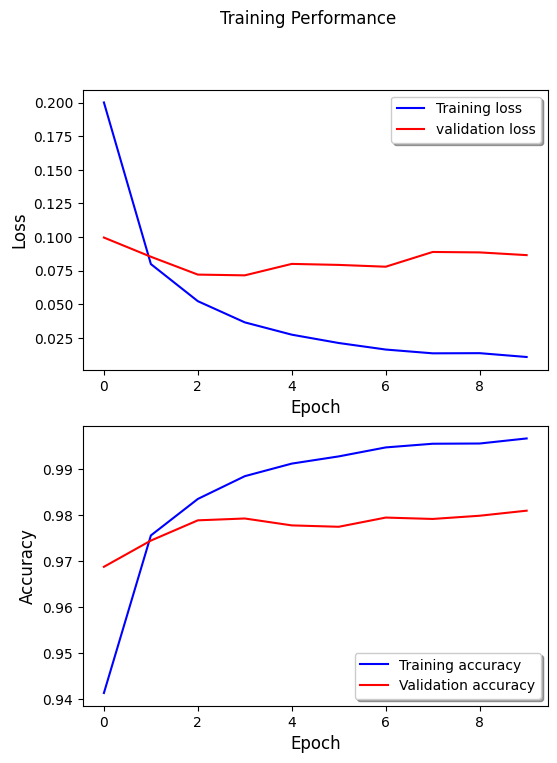

In [8]:

### EXAMPLE SOLUTION 3.1

fig, ax = plt.subplots(2,1, figsize=(6,8))

# plot the training and validation loss
fig.suptitle('Training Performance')
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].set_xlabel('Epoch', fontsize=12)
legend = ax[0].legend(loc='best', shadow=True)

# plot the training and validation accuracy
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_ylabel('Accuracy', fontsize=12)
ax[1].set_xlabel('Epoch', fontsize=12)
legend = ax[1].legend(loc='best', shadow=True)



313/313 [==============================] - 1s 2ms/step


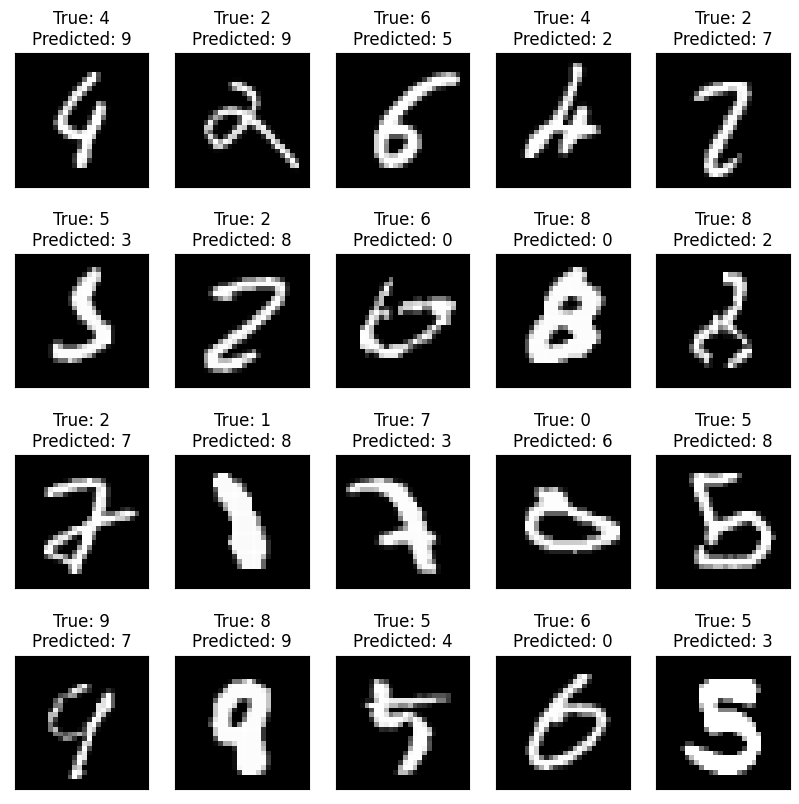

In [9]:

### EXAMPLE SOLUTION 3.2

y_hat_test = model.predict(X_test)
misclassified_idx = np.where(y_test.argmax(axis=1) != y_hat_test.argmax(axis=1))[0]
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[misclassified_idx[i]].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_title(f"True: {y_test[misclassified_idx[i]].argmax()}\nPredicted: {y_hat_test[misclassified_idx[i]].argmax()}", fontsize=12)

